In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('ML _1.csv')

In [99]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [100]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [101]:
print(df.dtypes)


No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the features and the target.
X = df.drop(['No', 'Y house price of unit area'], axis=1)
y = df['Y house price of unit area']


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
print("Scaling complete. Proceeding with model training is next.")

Scaling complete. Proceeding with model training is next.


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [107]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

In [109]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Performance:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R²: {train_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")

Linear Regression Performance:
Train MSE: 83.11
Test MSE: 53.51
Train R²: 0.56
Test R²: 0.68


In [143]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)

In [144]:
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [145]:
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)



LinearRegression()

In [113]:
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)

In [114]:
train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)
train_r2_poly = r2_score(y_train, y_train_pred_poly)
test_r2_poly = r2_score(y_test, y_test_pred_poly)

In [115]:
print(f"Polynomial Regression (Degree {degree}) Performance:")
print(f"Train MSE: {train_mse_poly:.2f}")
print(f"Test MSE: {test_mse_poly:.2f}")
print(f"Train R²: {train_r2_poly:.2f}")
print(f"Test R²: {test_r2_poly:.2f}")

Polynomial Regression (Degree 2) Performance:
Train MSE: 372.94
Test MSE: 364.87
Train R²: -0.98
Test R²: -1.17


In [116]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [117]:
y_train_pred_ridge = ridge_reg.predict(X_train_scaled)
y_test_pred_ridge = ridge_reg.predict(X_test_scaled)

In [118]:
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

In [119]:
print(f"Ridge Regression Performance:")
print(f"Train MSE: {train_mse_ridge:.2f}")
print(f"Test MSE: {test_mse_ridge:.2f}")
print(f"Train R²: {train_r2_ridge:2f} ")
print(f"Test R²: {test_r2_ridge:.2f}")

Ridge Regression Performance:
Train MSE: 83.11
Test MSE: 53.45
Train R²: 0.558114 
Test R²: 0.68


In [120]:
alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_test_pred_ridge = ridge_reg.predict(X_test_scaled)
    test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
    print(f"Ridge Regression (Alpha {alpha}) Test MSE: {test_mse_ridge:.2f}, Test R²: {test_r2_ridge:.2f}")


Ridge Regression (Alpha 0.1) Test MSE: 53.50, Test R²: 0.68
Ridge Regression (Alpha 1.0) Test MSE: 53.45, Test R²: 0.68
Ridge Regression (Alpha 10.0) Test MSE: 53.08, Test R²: 0.68


In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [123]:
y_train_pred_rf = random_forest_reg.predict(X_train_scaled)
y_test_pred_rf = random_forest_reg.predict(X_test_scaled)

In [124]:
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)


In [125]:
print(f"Random Forest Regression Performance:")
print(f"Train MSE: {train_mse_rf:.2f}")
print(f"Test MSE: {test_mse_rf:.2f}")
print(f"Train R²: {train_r2_rf:.2f}")
print(f"Test R²: {test_r2_rf:.2f}")

Random Forest Regression Performance:
Train MSE: 9.46
Test MSE: 32.56
Train R²: 0.95
Test R²: 0.81


In [126]:
feature_importances = random_forest_reg.feature_importances_

In [127]:
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'Importances': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importances', ascending=False)

print("Top Features:")
print(feature_importances_df.head())

Top Features:
                                  feature  Importances
2  X3 distance to the nearest MRT station     0.565340
1                            X2 house age     0.169454
4                             X5 latitude     0.125146
5                            X6 longitude     0.070510
0                     X1 transaction date     0.042911


In [128]:
from sklearn.model_selection import GridSearchCV

param_grid =  {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}



In [129]:
random_forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', 
                          n_jobs=-1)

In [130]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [131]:
best_params = grid_search.best_params_

In [132]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [133]:
tuned_random_forest_reg = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

In [134]:
tuned_random_forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=300,
                      random_state=42)

In [135]:
y_train_pred_tuned_rf = tuned_random_forest_reg.predict(X_train_scaled)
y_test_pred_tuned_rf = tuned_random_forest_reg.predict(X_test_scaled)

In [136]:
train_mse_tuned_rf = mean_squared_error(y_train, y_train_pred_tuned_rf)
test_mse_tuned_rf = mean_squared_error(y_test, y_test_pred_tuned_rf)
train_r2_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
test_r2_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

In [137]:
print(f"Tuned Random Forest Regression Performance:")
print(f"Train MSE: {train_mse_tuned_rf:.2f}")
print(f"Test MSE: {test_mse_tuned_rf:.2f}")
print(f"Train R²: {train_r2_tuned_rf:.2f}")
print(f"Test R²: {test_r2_tuned_rf:.2f}")

Tuned Random Forest Regression Performance:
Train MSE: 16.19
Test MSE: 30.85
Train R²: 0.91
Test R²: 0.82


In [138]:
feature_importances_tuned = tuned_random_forest_reg.feature_importances_


In [139]:
feature_importance_tuned_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_tuned
})


feature_importance_tuned_df = feature_importance_tuned_df.sort_values(by='Importance', ascending=False)



In [142]:
print("Top Features (Tuned Model):")
print(feature_importance_tuned_df.head())

Top Features (Tuned Model):
                                  Feature  Importance
2  X3 distance to the nearest MRT station    0.587657
1                            X2 house age    0.172474
4                             X5 latitude    0.115435
5                            X6 longitude    0.067051
0                     X1 transaction date    0.037074


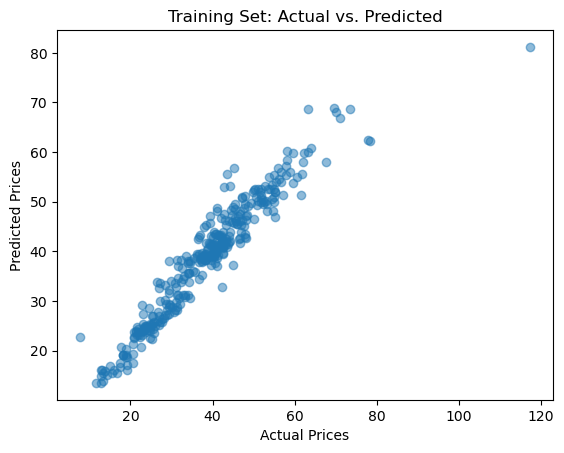

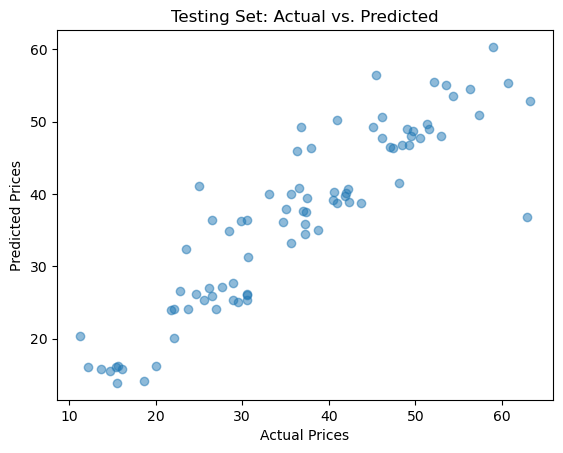

In [146]:
plt.scatter(y_train, y_train_pred_tuned_rf, alpha=0.5)
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

plt.scatter(y_test, y_test_pred_tuned_rf, alpha=0.5)
plt.title('Testing Set: Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [150]:
train_residuals = y_train - y_train_pred_tuned_rf
test_residuals = y_test - y_test_pred_tuned_rf

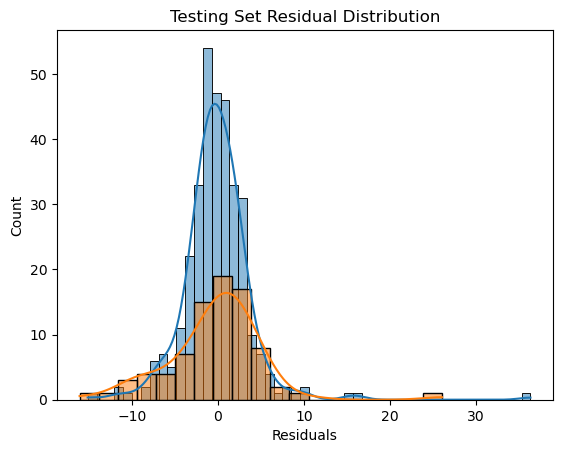

In [155]:
sns.histplot(train_residuals, kde=True)
plt.title('Training Set Residual Distribution')
plt.xlabel('Residuals')

sns.histplot(test_residuals, kde=True)
plt.title('Testing Set Residual Distribution')
plt.xlabel('Residuals')

plt.show()